[1] 220900      3


Warning message in locfdr(F_data, bre = max(ceiling(0.001 * length(F_data)), 100), :
"f(z) misfit = 8.9.  Rerun with increased df"


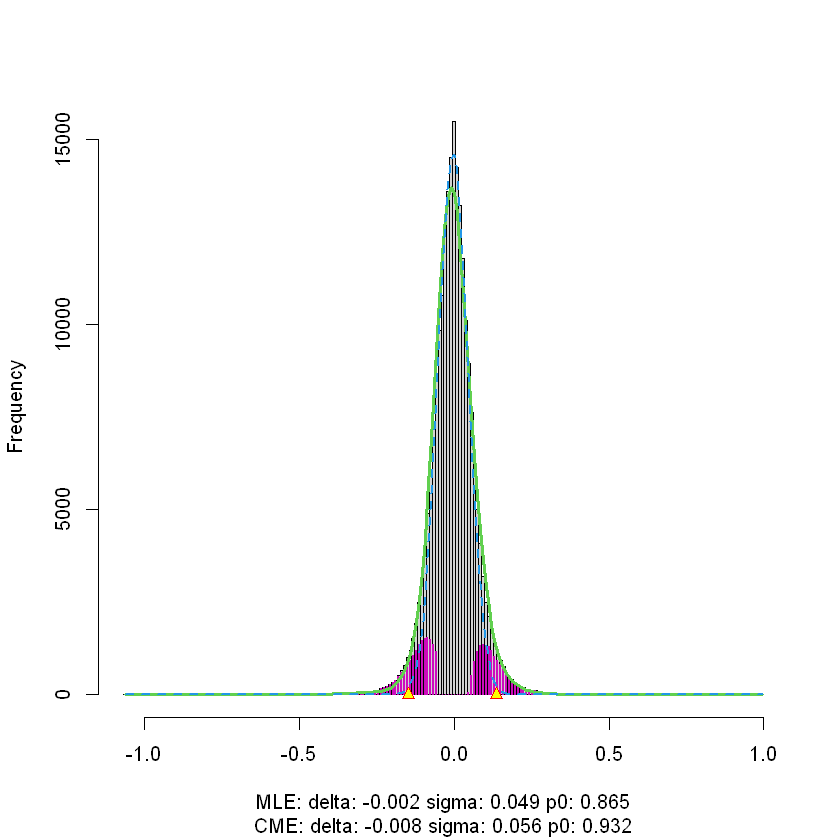

[1] 5145


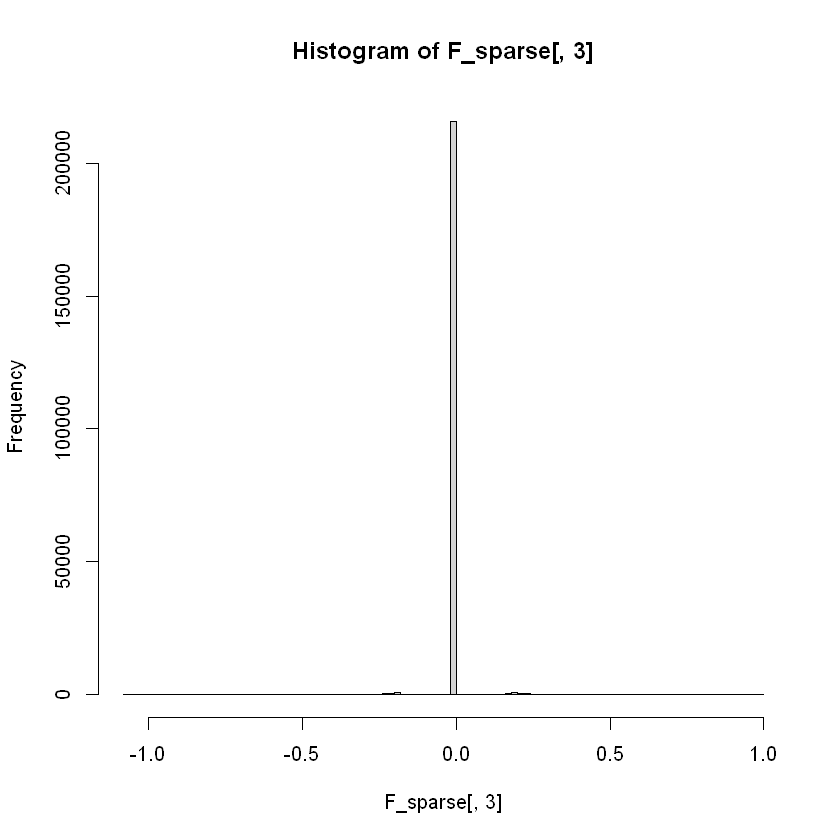

In [26]:
setwd('C:/Users/zoro/Desktop/Frustration_paper/data_analysis/dyn_version/result/')
library(locfdr)
library(reticulate)

np <-import("numpy")


F_sparse<-np$load('dyn_EG_F.npy')
F_data<-F_sparse[,3]
print(dim(F_sparse))
w <- locfdr(F_data,bre=max(ceiling(1e-3*length(F_data)),100),df=10,nulltype=1,plot=1)
#     hist(F_sparse[,3],breaks=100)
F_sparse[,3][which(w$fdr>=0.05)]<-0
hist(F_sparse[,3],breaks=100)
np$save(file.path(getwd(),'sparse_EG_F.npy'),F_sparse)
print(length(which(w$fdr<=0.05)))